#   Predictive Method  & Machine Learning  Homework

# Classify images of handwritten digits
**In this part, we will create a neural network that takes as input a grayscale image from the MNIST
dataset of size 28 × 28 and which returns the label of the number present on the image.**


In [6]:
#Installing Packages....
#pip install tensorflow
#conda install graphviz 
#pip install graphviz
#pip install pydot

In [7]:
#Importing packages...
import numpy as np
import tensorflow as tf 
from tensorflow import keras 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.metrics import confusion_matrix
import itertools
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

### First of all we load our MNIST DATA

In [8]:
#loading data...
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data(path="mnist.npz")

In [9]:
#Trainning and testing shape
print('Training data dimensions: ', x_train.shape, y_train.shape)
print('Test data dimensions: ', x_test.shape, y_test.shape)

Training data dimensions:  (60000, 28, 28) (60000,)
Test data dimensions:  (10000, 28, 28) (10000,)


In [10]:
#Number of classe
classes = np.unique(y_train)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


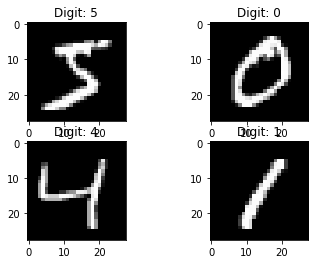

In [11]:
#Showing some data in the MNIS database
for i in range(4):  
    plt.subplot(2,2,0+1+i)
    plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
    plt.title(f"Digit: {y_train[i]}")

In [12]:
# convert in float32 (more memory allocated)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# scale to 0-1, note the 
x_train = x_train / 255.
x_test = x_test / 255.

## Part 1 : Architecture A for a neural network without convolution
In this part :

    - we create first our architecture
    
    - Implement the architecture diagram 
    
    - Train the neural network on the MNIST dataset (training set only)
    
    - Visualize the evolution of our model’s accuracy
    
    - Visualize the prediction of the neural network for a new input image

In [13]:
# First we reshape into  2D objects
x_train_A = x_train.reshape(x_train.shape[0], 28*28)
x_test_A = x_test.reshape(x_test.shape[0], 28*28)

In [14]:
#we convert y trainnng and testing into binary
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)
print('y in binary representation:', y_train[123])

y in binary representation: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


### Model Creation 

In [15]:
#https://www.machinecurve.com/index.php/2019/07/27/how-to-create-a-basic-mlp-classifier-with-the-keras-sequential-api/
# Set the input shape
input_shape = (28*28,)

# Create the model
model = Sequential()
model.add(Dense(360, input_shape=input_shape, activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(100, activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(20, activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 360)               282600    
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 360)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               36100     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 20)                2020      
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 20)                0         
_________________________________________________________________
batch_normalization (BatchNo (None, 20)                8

### Implement Architecture A

In [16]:
#implement Architecture A
keras.utils.plot_model(model, show_shapes=True)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


 ### Trainning the Neuronal Network A on Mnist Dataset

In [17]:
# Firt we compile the model by choosing the loss, the metrics and the otpimizer
model.compile(loss="categorical_crossentropy", metrics=['accuracy'], optimizer='adam')

In [18]:
#Then we train our model
A= model.fit(x_train_A, y_train, epochs=15,)

Epoch 1/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2367 - accuracy: 0.9354
Epoch 2/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1026 - accuracy: 0.9686
Epoch 3/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0726 - accuracy: 0.9774
Epoch 4/15
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0583 - accuracy: 0.9821
Epoch 5/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0481 - accuracy: 0.9851
Epoch 6/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0380 - accuracy: 0.9878
Epoch 7/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0343 - accuracy: 0.9889
Epoch 8/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0288 - accuracy: 0.9902
Epoch 9/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0250 - accuracy: 0.9922
Epoch 10/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.023

### Visualize the evolution of the model’s accuracy

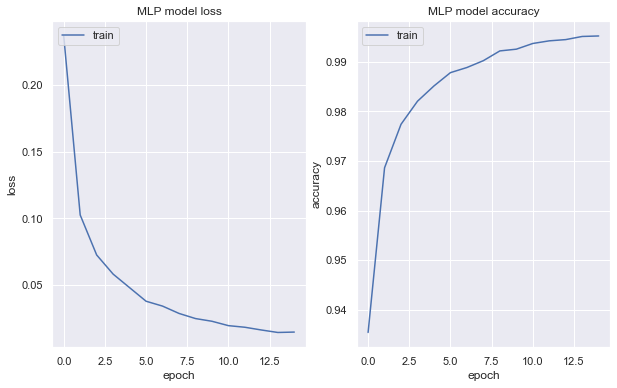

In [19]:
#plot the loss function 
sns.set()
plt.figure(figsize=(10,6))
plt.subplot(1, 2, 1)
plt.plot(A.history['loss'])
plt.title('MLP model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
#plot the accuracy
plt.subplot(1, 2, 2)
plt.plot(A.history['accuracy'])
plt.title('MLP model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

### Prediction 

In [20]:
#prediction with numpy
y_pred_prob = model.predict(x_test_A)
y_pred = np.argmax(y_pred_prob, axis=1)

MLP model prediction : 9 with predicted probability : 
[1.5519876e-05 3.2673142e-06 8.6466787e-07 4.5879795e-05 6.5950891e-03
 1.5280946e-04 7.9193496e-06 4.9978446e-02 8.4579183e-04 9.4235438e-01]


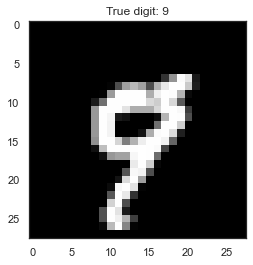

In [21]:
#ploting a prediction based on our testing sample
i=np.random.randint(1,10000)
sns.set_style("white")
plt.imshow(x_test[i,:,:],cmap='gray')
plt.title(f"True digit: {np.argmax(y_test[i])}")
print(f'MLP model prediction : {y_pred[i]} with predicted probability : \n{y_pred_prob[i]}')
plt.show()

In [22]:
#Here we create a list of our images for which the model predict poorly
#We call this list false_indices
false_indices =  np.where(np.argmax(y_test,axis = 1) != y_pred) ## false_indices is then a tuple 
false_indices[0].shape
print(false_indices[0])
print(false_indices[0][9])

[ 104  149  247  259  340  432  445  449  582  619  882  951  956  965
 1014 1039 1112 1128 1156 1226 1232 1242 1247 1260 1299 1319 1328 1393
 1395 1414 1425 1522 1530 1549 1554 1609 1681 1709 1748 1754 1790 1828
 1878 1901 1930 1938 1941 1968 1982 1987 2004 2035 2043 2053 2109 2118
 2135 2182 2185 2232 2272 2291 2369 2387 2406 2414 2426 2488 2542 2582
 2597 2607 2648 2654 2720 2760 2769 2812 2854 2863 2877 2921 2939 2953
 2979 3005 3073 3117 3172 3383 3422 3475 3503 3520 3549 3558 3597 3751
 3762 3808 3811 3853 3869 3893 3906 3941 3943 3951 3985 4027 4065 4140
 4163 4173 4176 4199 4201 4269 4271 4369 4405 4425 4437 4443 4497 4534
 4536 4551 4571 4690 4731 4740 4761 4807 4814 4823 4837 4879 4880 4918
 5140 5246 5676 5734 5757 5936 5937 5955 5973 6011 6023 6046 6059 6166
 6173 6558 6571 6572 6597 6783 6817 7081 7107 7434 7921 8246 8273 8311
 8527 9009 9015 9024 9517 9587 9634 9664 9669 9692 9719 9729 9733 9742
 9745 9768 9770 9808 9829 9839 9883 9904]
619


MLP model prediction : 2 with predicted probability : 
[8.7278140e-09 1.1444062e-06 9.9996018e-01 3.8837757e-06 3.3090795e-09
 7.4724458e-09 4.7036974e-07 7.6388386e-07 3.3321212e-05 1.5540688e-07]


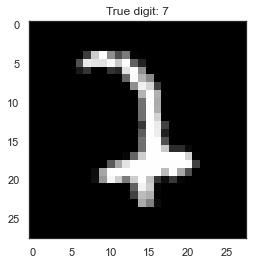

In [23]:
## Here we show a exemple of poor prediction
## We choose false_indices[0][19] who is the 20th image for which the model predict poorly
plt.imshow(x_test[false_indices[0][19],:,:], cmap='gray') 
plt.title(f"True digit: {np.argmax(y_test[false_indices[0][19]])}")
print(f'MLP model prediction : {y_pred[false_indices[0][19]]} with predicted probability : \n{y_pred_prob[false_indices[0][19]]}')

In [24]:
#Our Model accuracy
loss, accuracy = model.evaluate(x_test_A,y_test)
print()
print("MLP model accuracy: %0.3f " % (accuracy))


313/313 [==============================] - 1s 1ms/step - loss: 0.0781 - accuracy: 0.9810

MLP model accuracy: 0.981 


In [25]:
#Here we reshape our y_test in order to create our confusion matrix
# We named this new shape y_test_copy
y_test_copy = np.argmax(y_test,axis = 1)

In [26]:
#Evaluation of the classification accuracy
cfm = confusion_matrix(y_test_copy,y_pred,labels=np.arange(0,10).tolist())

In [27]:
#Here we create a new function named plot_confusion_matrix in order to plot our confusion matrix

def plot_confusion_matrix(cfm,target_names,title='Confusion matrix',cmap=None,normalize=True,color='Reds'):
    accuracy = np.trace(cfm) / np.sum(cfm).astype('float')
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap(color)

    plt.figure(figsize=(8, 6))
    plt.imshow(cfm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cfm = cfm.astype('float') / cfm.sum(axis=1)[:, np.newaxis]


    thresh = cfm.max() / 1.5 if normalize else cfm.max() / 2
    for i, j in itertools.product(range(cfm.shape[0]), range(cfm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cfm[i, j]),
                     horizontalalignment="center",
                     color="white" if cfm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cfm[i, j]),
                     horizontalalignment="center",
                     color="white" if cfm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

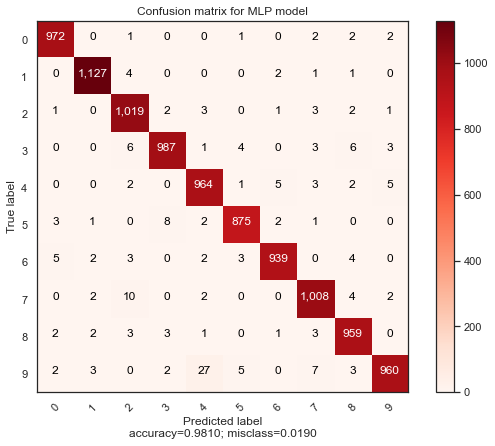

In [28]:
#plot the condusion_matrix
plot_confusion_matrix(cfm,np.arange(0,10).tolist(),
                          title= 'Confusion matrix for MLP model',
                          cmap=None,
                          normalize=False,color='Reds')

## Part 2 : Architecture B for convolution neural network
In this part :

- we create first our architecture

- Implement the architecture diagram 

- Train the neural network on the MNIST dataset (training set only)

- Visualize the evolution of our model’s accuracy

- Visualize the prediction of the neural network for a new input image

In [29]:
# We Reshape 
x_train_B = x_train.reshape(-1, 28,28, 1)
x_test_B = x_test.reshape(-1, 28,28, 1)
x_train_B.shape,x_test_B.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

### Model Creation 

In [30]:
model_B = Sequential()
model_B.add(Conv2D(48,kernel_size=(5,5),activation='relu',input_shape=(28,28,1),padding='same'))
model_B.add(MaxPooling2D((3, 3),padding='same'))
model_B.add(Conv2D(64, (3, 3), activation='relu',padding='same'))
model_B.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model_B.add(Conv2D(128, (2, 2), activation='relu',padding='same'))
model_B.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model_B.add(Flatten())
model_B.add(Dense(116, activation='relu'))
model_B.add(Dense(64, activation='relu'))
model_B.add(Dense(10, activation='softmax'))
model_B.summary() 

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 48)        1248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 10, 10, 48)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 64)        27712     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 5, 5, 128)         32896     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 1152)             

### Implementing Architecture B 

In [31]:
keras.utils.plot_model(model_B, show_shapes=True)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


### Trainning the Convolutionnal  Neuronal Network B

In [32]:
#compile the model by choosing the loss, the metrics and the otpimizer
model_B.compile(loss="categorical_crossentropy", metrics=['accuracy'], optimizer='adam')

In [33]:
B = model_B.fit(x_train_B, y_train, epochs=10, batch_size=250)

Epoch 1/10
240/240 [==============================] - 40s 163ms/step - loss: 0.3765 - accuracy: 0.8841
Epoch 2/10
240/240 [==============================] - 39s 162ms/step - loss: 0.0763 - accuracy: 0.9766
Epoch 3/10
240/240 [==============================] - 37s 156ms/step - loss: 0.0558 - accuracy: 0.9826
Epoch 4/10
240/240 [==============================] - 37s 156ms/step - loss: 0.0427 - accuracy: 0.9872
Epoch 5/10
240/240 [==============================] - 39s 163ms/step - loss: 0.0366 - accuracy: 0.9885
Epoch 6/10
240/240 [==============================] - 38s 157ms/step - loss: 0.0288 - accuracy: 0.9914
Epoch 7/10
240/240 [==============================] - 38s 157ms/step - loss: 0.0249 - accuracy: 0.9916
Epoch 8/10
240/240 [==============================] - 40s 165ms/step - loss: 0.0203 - accuracy: 0.9939
Epoch 9/10
240/240 [==============================] - 38s 158ms/step - loss: 0.0183 - accuracy: 0.9940
Epoch 10/10
240/240 [==============================] - 38s 159ms/step - l

### Visualize the evolution of the model’s accuracy  

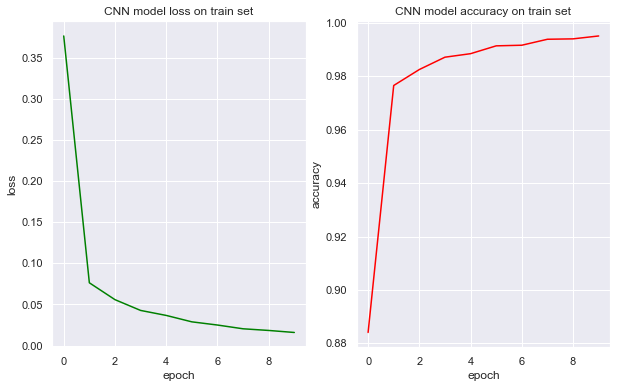

In [34]:
sns.set()
plt.figure(figsize=(10,6))
plt.subplot(1, 2, 1)
plt.plot(B.history['loss'],color="green")
plt.title('CNN model loss on train set')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.subplot(1, 2, 2)
plt.plot(B.history['accuracy'],color="red")
plt.title('CNN model accuracy on train set')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

### Prediction

In [35]:
##prediction 
y_pred_prob_B = model_B.predict(x_test_B)
y_pred_B = np.argmax(y_pred_prob_B, axis=1)

CNN model prediction : 1 with predicted probability : 
[5.30972648e-06 9.99509096e-01 2.18491023e-05 1.04076386e-10
 3.59891041e-04 2.07290668e-07 1.37714312e-06 1.11618237e-05
 8.95441626e-05 1.43347791e-06]


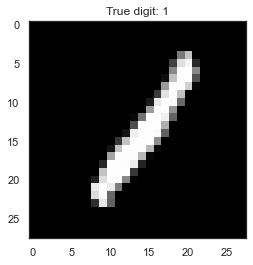

In [36]:
#ploting a prediction result for a random image in the test sample
i=np.random.randint(1,10000)
sns.set_style("white")
plt.imshow(x_test[i,:,:], cmap='gray')
plt.title(f"True digit: {np.argmax(y_test[i])}")
print(f'CNN model prediction : {y_pred_B[i]} with predicted probability : \n{y_pred_prob_B[i]}')

In [37]:
#Here we create a list of our images for which the model predict poorly
#We call this list false_indices
false_indices_B =  np.where(np.argmax(y_test,axis = 1) != y_pred_B) ## false_indices is then a tuple 
false_indices_B[0].shape
print(false_indices_B[0])
print(false_indices_B[0][1])

[ 115  151  449  582  583  619  625  646  674  684  691  720  900  938
  947 1014 1039 1044 1182 1226 1232 1260 1319 1621 1709 1737 1901 1909
 1982 2018 2035 2118 2129 2130 2195 2293 2329 2414 2454 2597 2607 2654
 2743 2896 2927 2939 2995 3005 3073 3225 3369 3422 3441 3520 3534 3558
 3751 3767 3808 3838 3853 3869 3985 4078 4176 4201 4443 4497 4507 4536
 4571 4620 4740 4823 5457 5654 5655 5937 5955 5973 6011 6101 6400 6558
 6572 6597 6623 6625 6651 6783 7216 7849 7856 7899 7928 7978 8316 8325
 8326 8376 8408 9015 9051 9505 9530 9540 9587 9622 9642 9645 9679 9692
 9698 9729]
151


CNN model prediction : 4 with predicted probability : 
[1.2262717e-06 1.6917345e-05 2.5567083e-06 5.4299767e-07 9.6800286e-01
 9.3555473e-06 3.9430738e-06 3.1219227e-07 3.3828433e-04 3.1624008e-02]


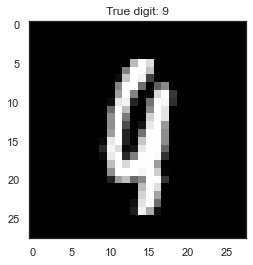

In [38]:
## Here we show a exemple of poor prediction
## We choose false_indices[0][20] who is the 20th image for which the model predict poorly
sns.set_style("white")
plt.imshow(x_test[false_indices_B[0][20],:,:], cmap='gray') 
plt.title(f"True digit: {np.argmax(y_test[false_indices_B[0][20]])}")
print(f'CNN model prediction : {y_pred_B[false_indices[0][20]]} with predicted probability : \n{y_pred_prob_B[false_indices[0][20]]}')

In [39]:
#Our Model Accuracy
loss_B, accuracy_B = model_B.evaluate(x_test_B,y_test)
print()
print("CNN model accuracy: %0.3f " % (accuracy_B))


313/313 [==============================] - 2s 7ms/step - loss: 0.0304 - accuracy: 0.9886

CNN model accuracy: 0.989 


In [40]:
#Evaluation of the classification accuracy
cfm_B = confusion_matrix(y_test_copy,y_pred_B,labels=np.arange(0,10).tolist())

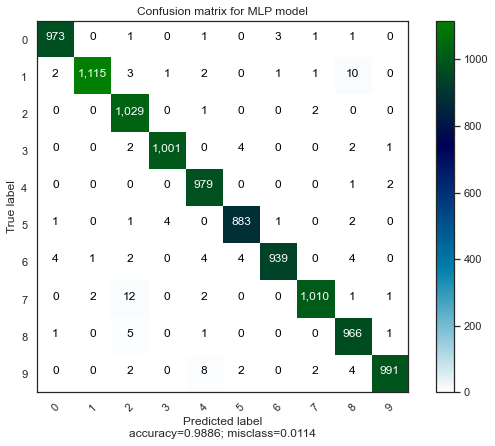

In [41]:
#Ploting our confusion matrix
plot_confusion_matrix(cfm_B,np.arange(0,10).tolist(),
                          title= 'Confusion matrix for MLP model',
                          cmap=None,
                          normalize=False,color='ocean_r')

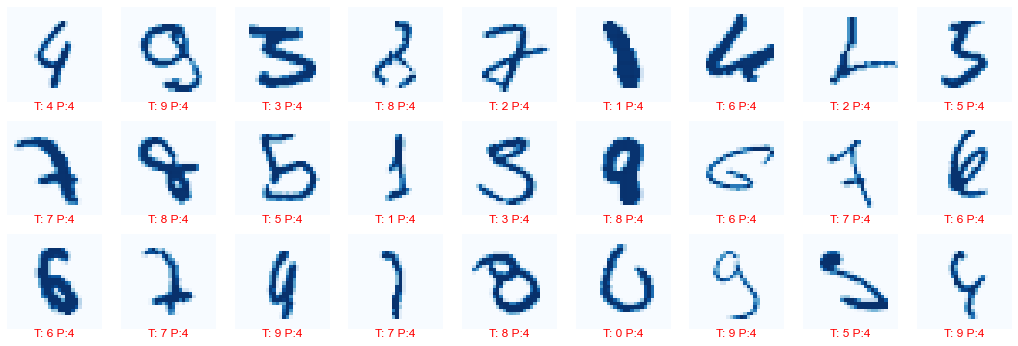

In [42]:
#Here we create a subplot of our fake indices
rows = 4
cols = 9

f = plt.figure(figsize=(2*cols,2*rows))
sub_plot = 1
for i in range(27):
        f.add_subplot(rows,cols,sub_plot) 
        sub_plot+=1
        plt.imshow(x_test[false_indices_B[0][i],:,:], cmap='Blues')
        plt.axis("off")
        plt.title("T: "+str(y_test_copy[false_indices_B[0][i]])+" P:"+str(y_pred_B[false_indices[0][20]]), y=-0.15,color="Red")
plt.show()